In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
drag_data_14 = pd.read_csv('../../parallelFlow_bfThick-14microns_interpolated/3D_riblet/integral_results/drag_over_time.csv')
drag_data_28 = pd.read_csv('integral_results/drag_over_time.csv')
drag_data_50 = pd.read_csv('../../parallelFlow_bfThick-50microns_interpolated/3D_riblet/integral_results/drag_over_time.csv')
#vol_data = pd.read_csv('integral_results/volumeIntegral_DOT.csv')
surf_data = pd.read_csv('integral_results/surfaceIntegral_DOT.csv')

drag_data_14 = drag_data_14.rename(columns=lambda x: x.strip())
drag_data_28 = drag_data_28.rename(columns=lambda x: x.strip())
drag_data_50 = drag_data_50.rename(columns=lambda x: x.strip())
#vol_data = vol_data.rename(columns=lambda x: x.strip())
surf_data = surf_data.rename(columns=lambda x: x.strip())



In [3]:
#drag_data['F_x']

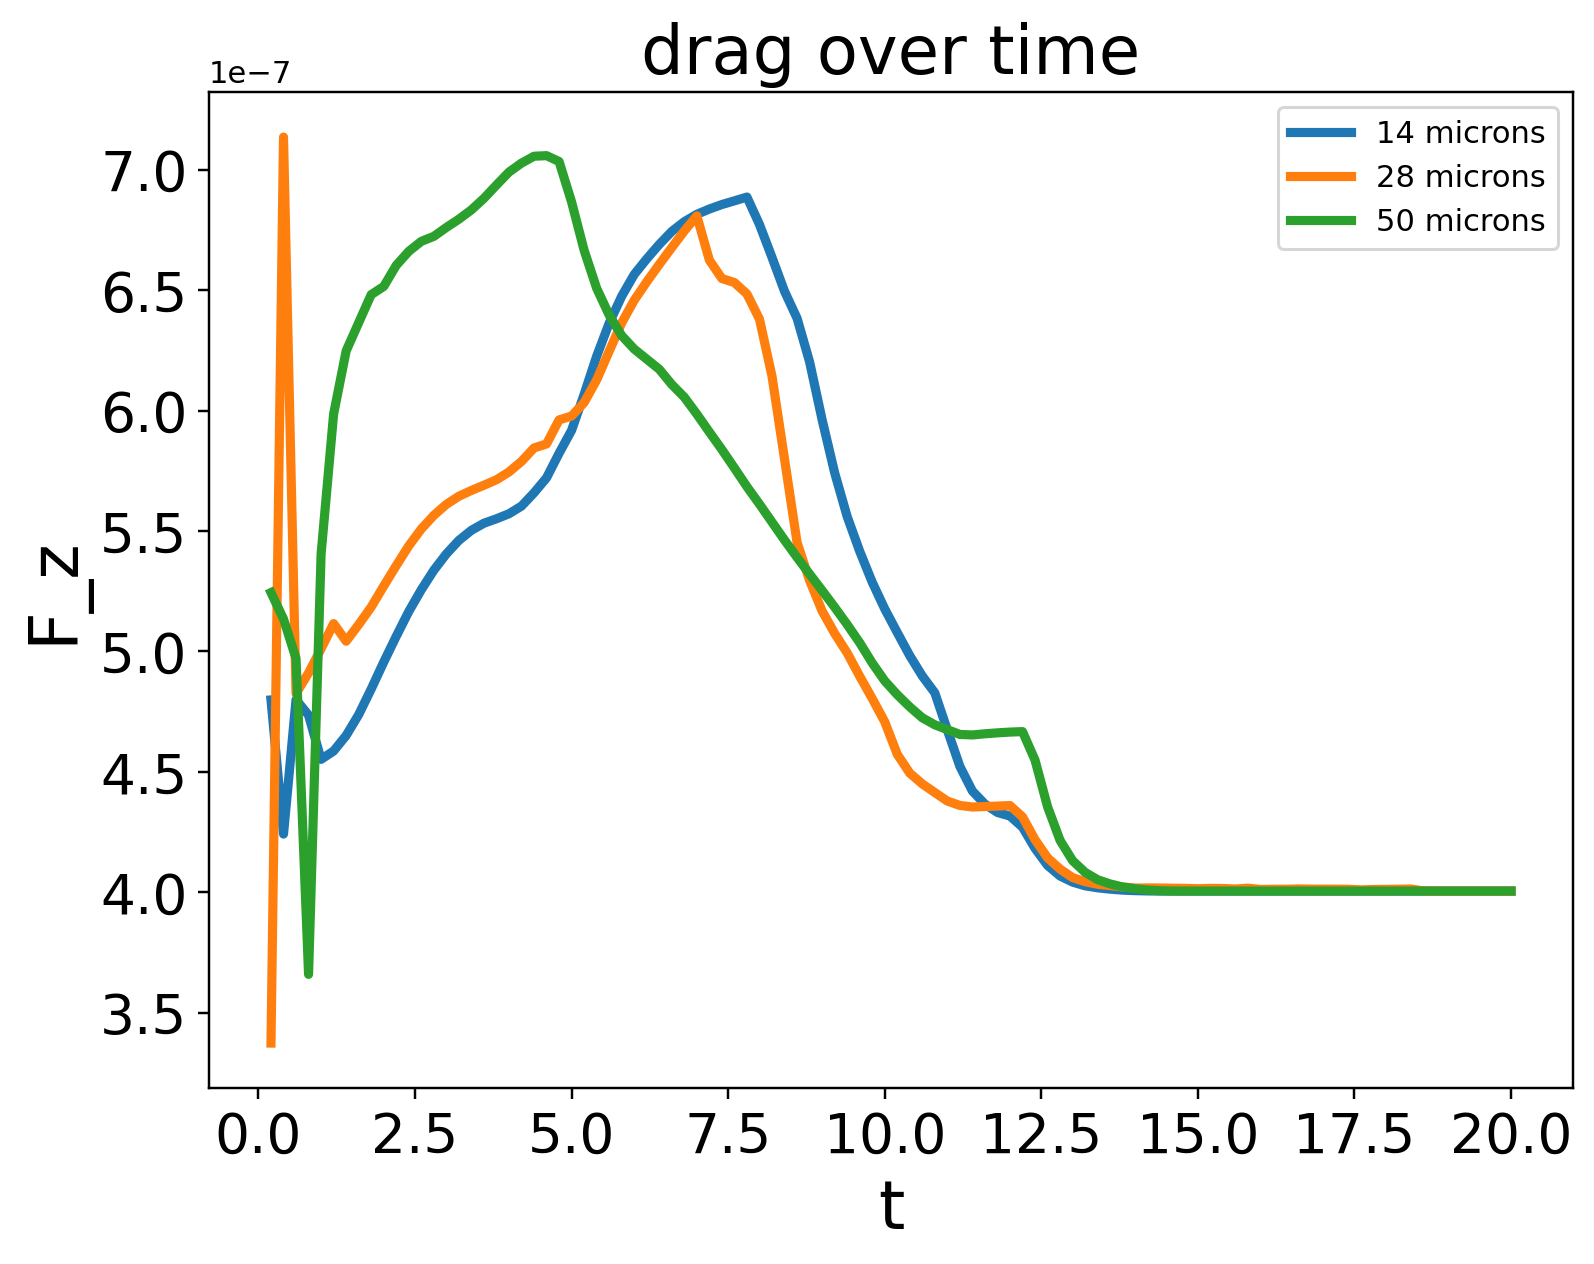

In [4]:
#print(drag_data.keys[-1])
plt.figure(figsize=(8,6), dpi=220)
plt.plot(drag_data_14['t'], drag_data_14['F_z'], lw=3, label="14 microns")
plt.plot(drag_data_28['t'], drag_data_28['F_z'], lw=3, label="28 microns")
plt.plot(drag_data_50['t'], drag_data_50['F_z'], lw=3, label="50 microns")

plt.title("drag over time", fontsize=22)
plt.ylabel("F_z", fontsize=22)
plt.xlabel("t", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend()
plt.savefig('dragOverTime_parallel.pdf')
plt.show()

In [47]:
def collate_all_dataframes(results_directory, delta_t, t_max):
    '''
    for the alpha over time data, need to collate all the individual dataframes into one master one
    '''
    
    t_vals = np.arange(delta_t, t_max+delta_t, delta_t)
    dataframe_list = [] #empty list to store dataframes
    #print(t_vals.size)
    for i in range(t_vals.size):
        t_string = "{:.1f}".format(t_vals[i])
        
        df = pd.read_csv(results_directory+"alpha_data-t="+t_string+".csv")
        df['t'] = t_vals[i]
        dataframe_list.append(df)
        
    master_dataframe = pd.concat(dataframe_list ,ignore_index=True) #collate all the individual dataframes together
    master_dataframe['alpha_normalised'] = master_dataframe['alpha.biofilm']/np.amax(master_dataframe['alpha.biofilm'])
    #master_dataframe['sd'] = 2
    return master_dataframe

In [48]:
delta_t = 0.2
t_max = 20.

thinBF_alpha_directory = "/home/patrick/PhD/openfoam_results/big_riblet_runs/parallel_flow/parallelFlow_bfThick-14microns_interpolated/3D_riblet/alpha_data/"
mediumBF_alpha_directory = "/home/patrick/PhD/openfoam_results/big_riblet_runs/parallel_flow/parallelFlow_bfThick-28microns_interpolated/3D_riblet/alpha_data/"
thickBF_alpha_directory = "/home/patrick/PhD/openfoam_results/big_riblet_runs/parallel_flow/parallelFlow_bfThick-50microns_interpolated/3D_riblet/alpha_data/"


alpha_data_14 = collate_all_dataframes(thinBF_alpha_directory, delta_t, t_max)
alpha_data_28 = collate_all_dataframes(mediumBF_alpha_directory, delta_t, t_max)
alpha_data_50 = collate_all_dataframes(thickBF_alpha_directory, delta_t, t_max)

alpha_data_14

,U:0,U:1,U:2,alpha.biofilm,p,p_rgh,Volume,Cell Type,Cell ID,t,alpha_normalised
0,1.826700e-15,2.788350e-15,5.589310e-12,4.618640e-12,8.378830e-11,8.378830e-11,6.502040e-11,1,0,0.2,1.000000e+00
1,3.076680e-17,2.506530e-15,5.565020e-12,4.515070e-12,8.631150e-11,8.631150e-11,6.502040e-11,1,0,0.4,9.775756e-01
2,2.052650e-16,3.331040e-15,5.455790e-12,4.433040e-12,9.284290e-11,9.284290e-11,6.502040e-11,1,0,0.6,9.598150e-01
3,-7.353700e-15,2.831810e-15,5.409090e-12,4.452480e-12,8.908710e-11,8.908710e-11,6.502040e-11,1,0,0.8,9.640240e-01
4,-7.104630e-15,3.096230e-15,5.294990e-12,4.466420e-12,8.018700e-11,8.018700e-11,6.502040e-11,1,0,1.0,9.670422e-01
...,...,...,...,...,...,...,...,...,...,...,...
95,8.384650e-27,-2.656730e-28,5.489790e-12,8.952880e-31,7.709260e-24,7.709260e-24,6.502040e-11,1,0,19.2,1.938423e-19
96,5.959640e-27,-1.981410e-28,5.489790e-12,8.952880e-31,1.878050e-24,1.878050e-24,6.502040e-11,1,0,19.4,1.938423e-19
97,8.766470e-27,-2.214270e-28,5.489790e-12,8.952880e-31,4.412250e-24,4.412250e-24,6.502040e-11,1,0,19.6,1.938423e-19
98,9.818280e-27,-1.936420e-28,5.489790e-12,8.952880e-31,9.944180e-25,9.944180e-25,6.502040e-11,1,0,19.8,1.938423e-19


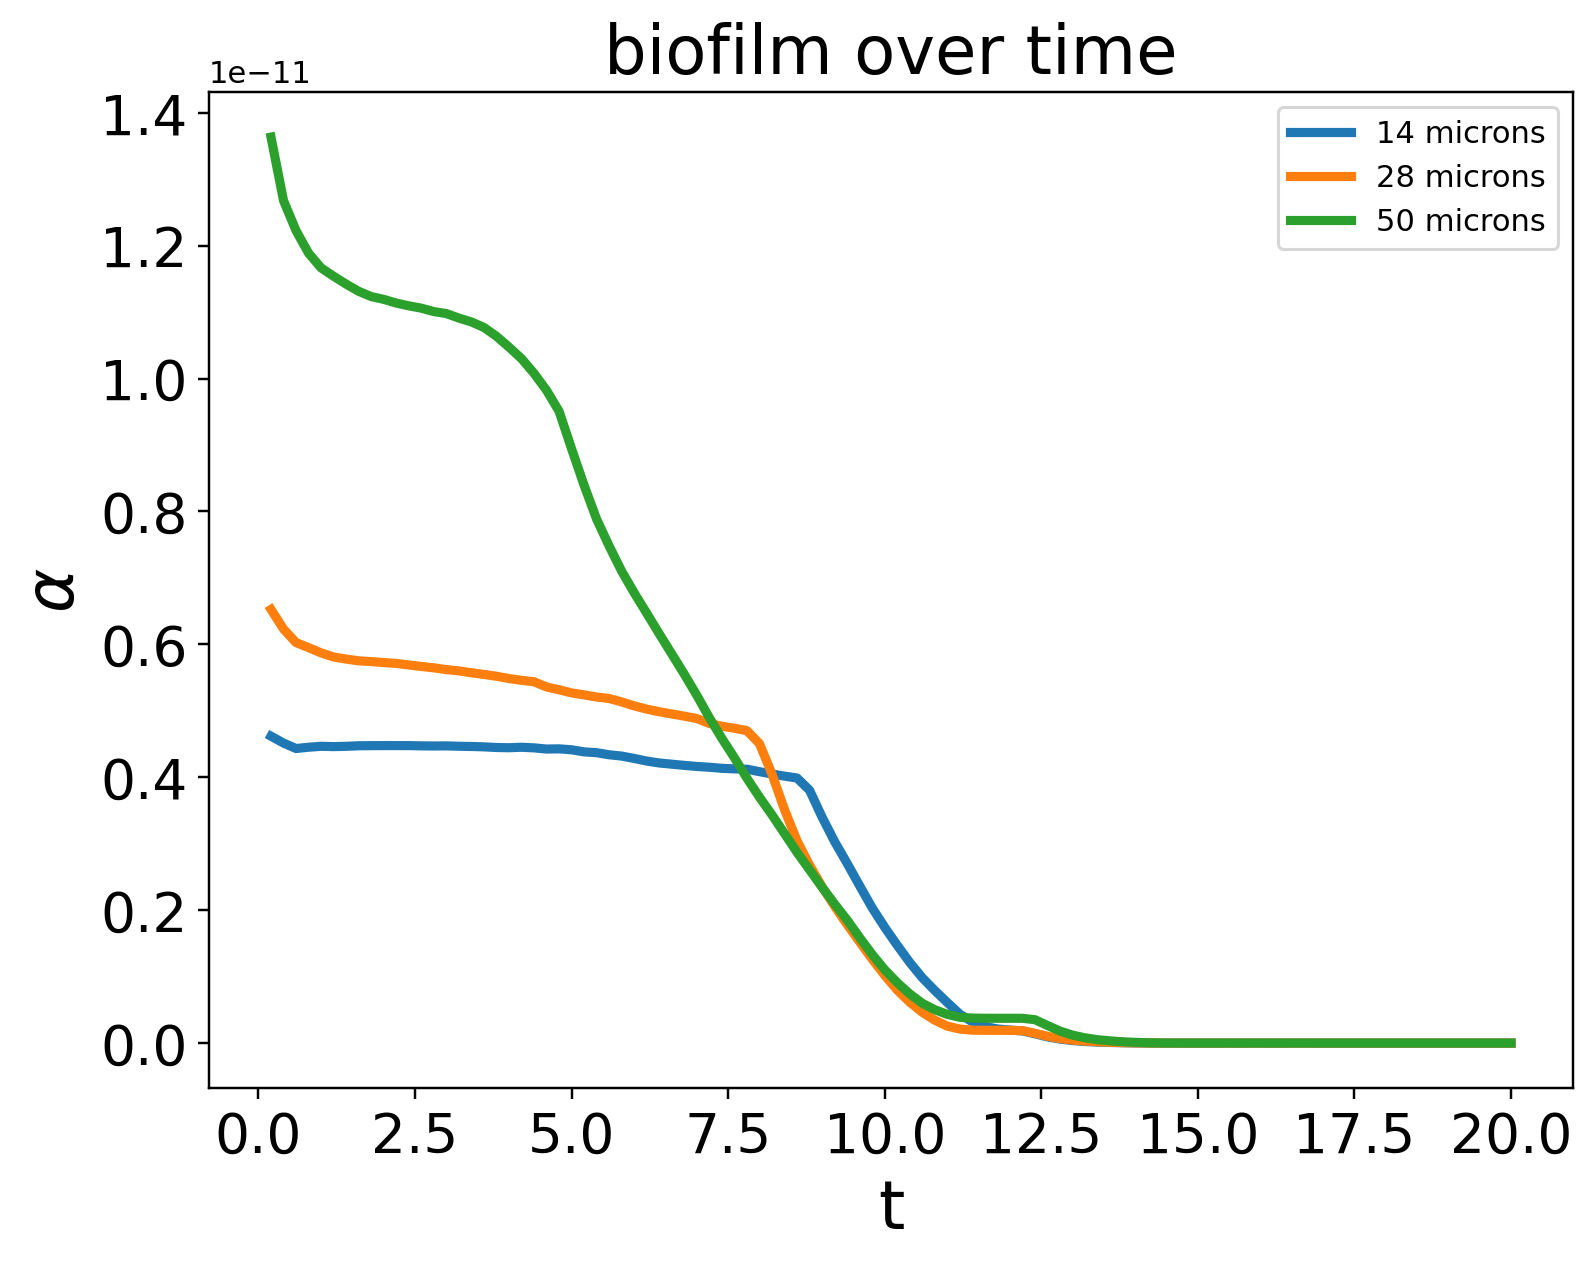

In [34]:
plt.figure(figsize=(8,6), dpi=220)
plt.plot(alpha_data_14['t'], alpha_data_14['alpha.biofilm'], lw=3, label="14 microns")
plt.plot(alpha_data_28['t'], alpha_data_28['alpha.biofilm'], lw=3, label="28 microns")
plt.plot(alpha_data_50['t'], alpha_data_50['alpha.biofilm'], lw=3, label="50 microns")

plt.title("biofilm over time", fontsize=22)
plt.ylabel("$\\alpha$", fontsize=22)
plt.xlabel("t", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend()
plt.savefig('alphaOverTime_parallel.pdf')
plt.show()

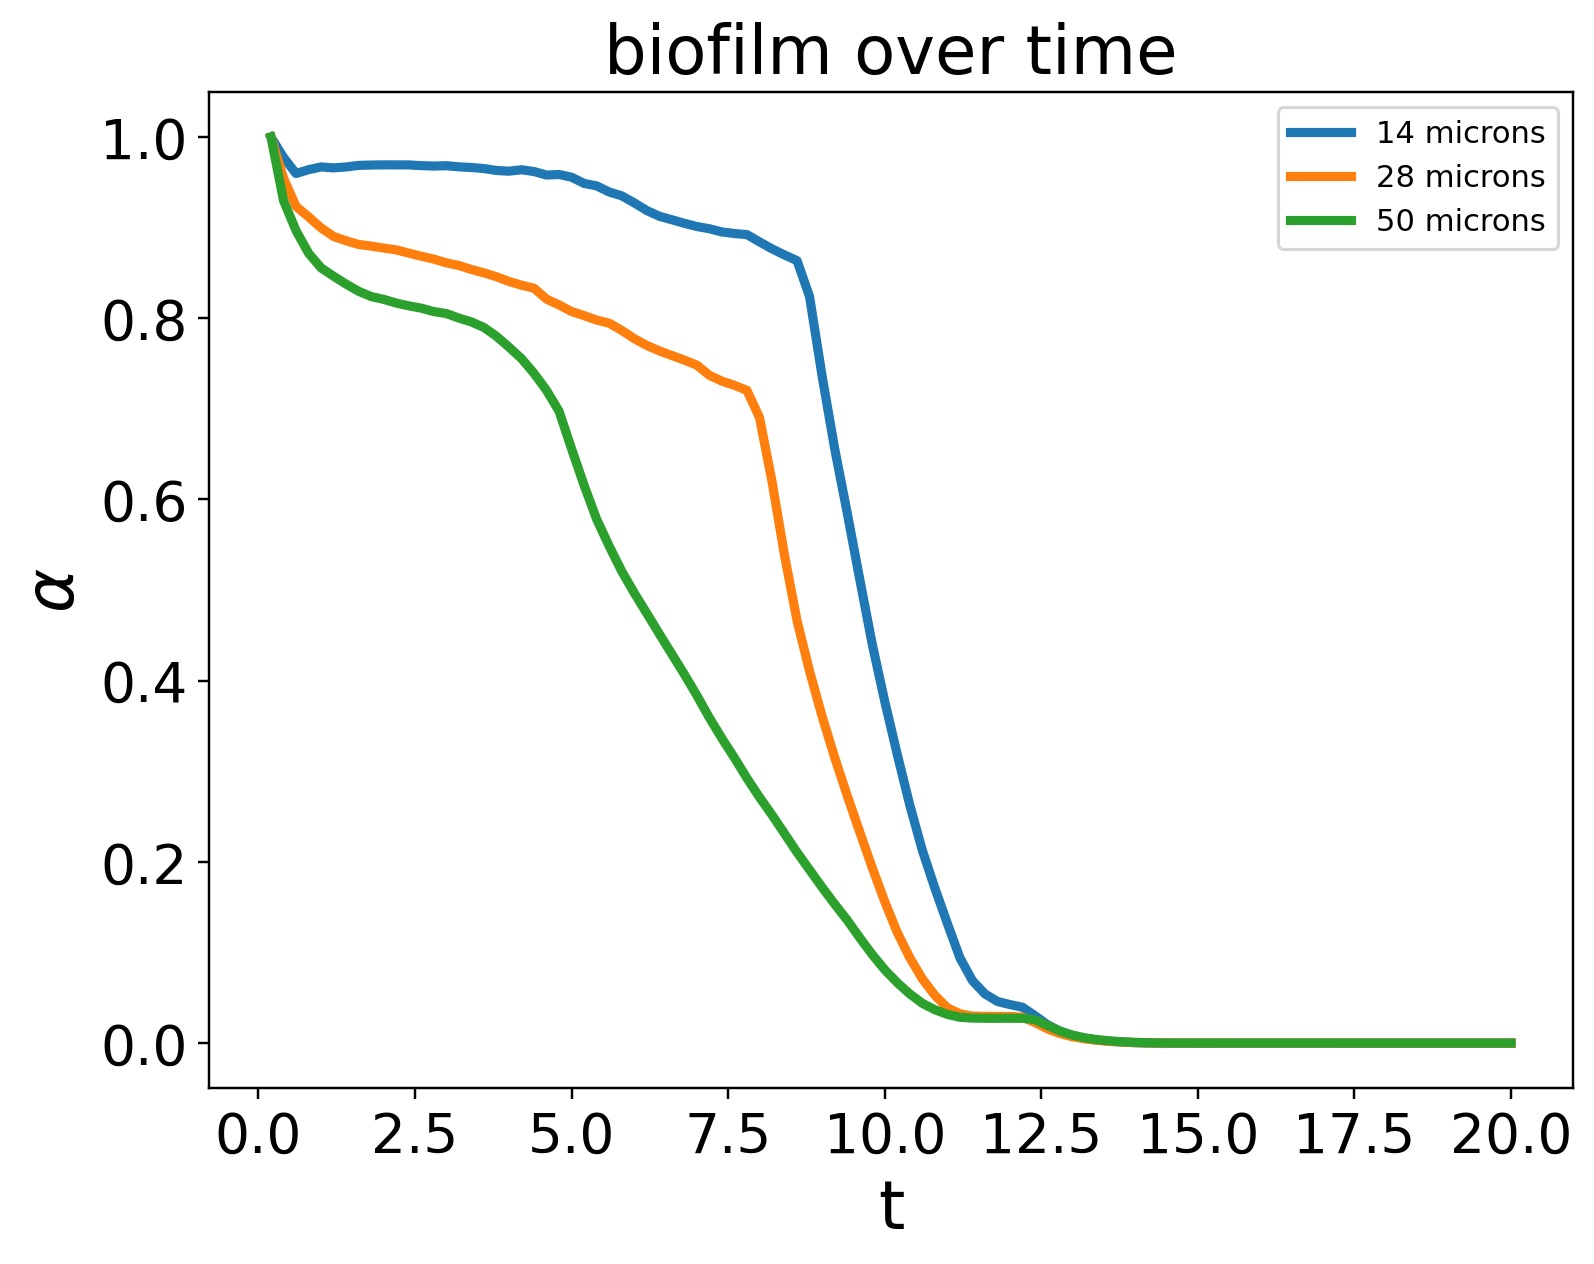

In [49]:
plt.figure(figsize=(8,6), dpi=220)
plt.plot(alpha_data_14['t'], alpha_data_14['alpha_normalised'], lw=3, label="14 microns")
plt.plot(alpha_data_28['t'], alpha_data_28['alpha_normalised'], lw=3, label="28 microns")
plt.plot(alpha_data_50['t'], alpha_data_50['alpha_normalised'], lw=3, label="50 microns")

plt.title("biofilm over time", fontsize=22)
plt.ylabel("$\\alpha$", fontsize=22)
plt.xlabel("t", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend()
plt.savefig('alphaOverTime_parallel_NORMALISED.pdf')
plt.show()

In [5]:
# plt.figure(figsize=(8,6))
# plt.plot(vol_data['t'], vol_data['F_z'], lw=3)
# plt.title("volume integral over time", fontsize=22)
# plt.ylabel("F_z", fontsize=22)
# plt.xlabel("t", fontsize=22)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)

# plt.savefig('volIntegralOverTime.pdf')
# plt.show()

NameError: name 'vol_data' is not defined

<Figure size 576x432 with 0 Axes>

In [ ]:
plt.plot(surf_data['t'], -surf_data['F_z'])

plt.show()

In [ ]:
numbers = [random.randint(0,100) for n in range(20)]
print("Original list:")
print(numbers)

for i in range(-len(numbers),0):
    # if remainder of division by 2 is zero, delete list entry
    if numbers[i]%2==0:
        del numbers[i]

# Print the remaining list with all odd numbers
print("Odd entries:")
print(numbers)

In [ ]:
import math

In [ ]:
def my_function(x, N):
    total = 0
    
    for i in range(1, N+1):
        total += 1/(2*i - 1)*math.sin((2.*i - 1)*x)
        
    return total

# Main method
def main(N):
    
    # number of data points
    n_loop = 100

    # open output file
    #out_file = open("cosine.dat","w")

    # prepare data lists
    x_values = []
    y_values = []

    # obtain function values and write them to file
    for i in range(n_loop):
        x = 2*math.pi*i/n_loop - math.pi
        f = my_function(x, N)
    
        # append data to lists and output file
        x_values.append(x)
        y_values.append(f)
    
        #out_file.write(str(x) + " " + str(f) + "\n")

    # close output file
    #out_file.close()

    # plot result
    plt.plot(x_values,y_values)
    plt.suptitle('Plotting the cosine function')
    plt.xlabel('X')
    plt.ylabel('Cos(X)')
    plt.show()

In [ ]:
main(4)